## Linear Regression Practice

For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.

In [8]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

You'll be working with the combined gdp and life expectancy data.

In [9]:
gdp_le = pd.read_csv('../data/gdp_le.csv').dropna()

In [10]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588
5500,Zimbabwe,1993,2458.783255,Africa,54.426
5501,Zimbabwe,1992,2468.278257,Africa,56.435
5502,Zimbabwe,1991,2781.787843,Africa,58.091


Q1) Start by fitting a linear regression model with target being life expectancy and predictor variable year. 
- a. What coefficients do you get? Interpret the meaning of these coefficents.
- b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?
- c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?
- d. Plot the actual values against your model's estimates for the mean life expectancy.
- e. Inspect the R-squared value for the model. does it make sense, given the plot?

### **Question 1:** Start by fitting a linear regression model with target being life expectancy and predictor variable year.


a. What coefficients do you get? Interpret the meaning of these coefficents.

In [11]:
lm = smf.ols('Life_Expectancy ~ GDP_Per_Capita', data = gdp_le).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     4149.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:30:36   Log-Likelihood:                -18608.
No. Observations:                5504   AIC:                         3.722e+04
Df Residuals:                    5502   BIC:                         3.723e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         63.5767      0.128    497.815      0.000      63.326      63.827
GDP_Per_Capita     0.0003   4.69e-06     64.411      0.000       0.000       0.000
==============================================================================
Omnibus:                      899.156   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1426.881
Skew:                          -1.132   Prob(JB):                    1.43e-310
Kurtosis:                       4.046   Cond. No.                     3.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ans: mean(life_expectancy) = 63.5767 + 0.0003 * GDP_Per_Capita

For every $1 increase in a nation's GDP_Per_Capita, its average life expectancy increases by 0.0003 years.  

### **Q1b**: Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

In [12]:
gdp_le_1990andOn = gdp_le[gdp_le['Year'] >= 1990].copy()
gdp_le_1990andOn

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588
5500,Zimbabwe,1993,2458.783255,Africa,54.426
5501,Zimbabwe,1992,2468.278257,Africa,56.435
5502,Zimbabwe,1991,2781.787843,Africa,58.091


In [13]:
lm = smf.ols('Life_Expectancy ~ I(Year-1990)', data = gdp_le_1990andOn).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        20:30:36   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ans: For each year progressed since 1990, we see an increase of average life expectancy of 0.2677 years. Yes, this coefficient of 0.2677 is statistically significant, since we see its p-value < 0.05 

Ans: For each year progressed since 1990, we see an increase of average life expectancy of 0.2677 years. Yes, this coefficient of 0.2677 is statistically significant, since we see its p-value < 0.05 

### **Q1c**: Compare the actual mean life expectancy per year to the model's estimate. How well does it do?

In [14]:
MeanLifeExpectancy = gdp_le_1990andOn.groupby('Year').mean('Life_Expectancy').reset_index() 
MeanLifeExpectancy

,Year,GDP_Per_Capita,Life_Expectancy
0,1990,13196.952982,64.745253
1,1991,13233.479065,65.021276
2,1992,13491.014044,65.217845
3,1993,13590.337328,65.218031
4,1994,13717.686044,65.339539
5,1995,14084.477919,65.956224
6,1996,14379.581959,66.200189
7,1997,14817.373911,66.437280
8,1998,15088.809042,66.556082
9,1999,15414.445790,66.916176


In [15]:
lm = smf.ols('Life_Expectancy ~ I(Year-1990)', data = MeanLifeExpectancy).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           5.88e-26
Time:                        20:30:36   Log-Likelihood:                -18.371
No. Observations:                  33   AIC:                             40.74
Df Residuals:                      31   BIC:                             43.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6263      0.148    435.844      0.000      64.324      64.929
I(Year - 1990)     0.2677      0.008     33.616      0.000       0.251       0.284
==============================================================================
Omnibus:                       15.367   Durbin-Watson:                   0.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.622
Skew:                          -1.337   Prob(JB):                     0.000149
Kurtosis:                       5.380   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ans for 1d

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

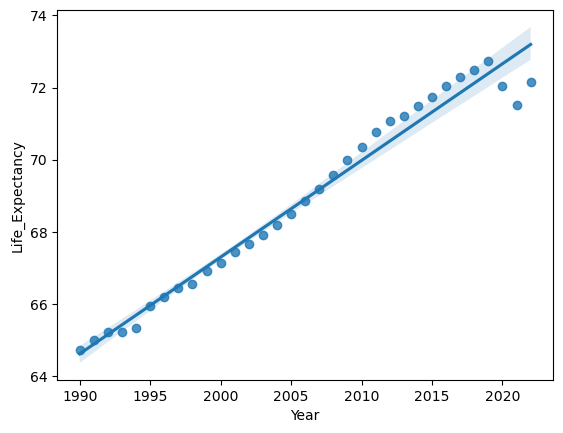

In [16]:
sns.regplot(x="Year", y="Life_Expectancy", data = MeanLifeExpectancy)

In [17]:
MeanLifeExpectancy['Year'].corr(MeanLifeExpectancy['Life_Expectancy'])

0.9865598907362619

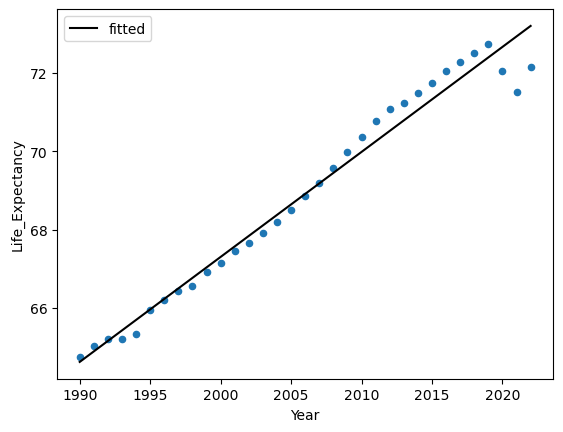

In [18]:
ax = MeanLifeExpectancy.plot(x = 'Year', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'Year': np.linspace(
        start = gdp_le_1990andOn['Year'].min(),
        stop = gdp_le_1990andOn['Year'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'Year', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

**1c Ans:** fits very well. The regression line of fit can account for > 97% of the variations seen in the data. 

**1e Ans:** the adjust R-squared value = 0.972

### Q2: Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.

For this part, we'll look at our dataset just for the year 2021.

In [19]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021].copy()

Fit a linear regression model on the 2021 data with target variable life expenctancy and predictor variable GDP per capita.

In [20]:
lm = smf.ols('Life_Expectancy ~ GDP_Per_Capita', data = gdp_le_2021 ).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        20:30:37   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         65.9499      0.549    120.225      0.000      64.867      67.033
GDP_Per_Capita     0.0003   1.76e-05     14.608      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                     4.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

mean(life_expectancy) = 65.9499 + 0.0003 * GDP_Per_Capita

### **Q2a:** What coefficients do you get? Interpret the meaning of those coefficients.

**2a Ans:** For every $1 increase in a nation's GDP_Per_Capita, its average life expectancy increases by 0.0003 years.  

### **Q2b:** Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?

**2b Ans:** Coefficient increased by a factor of 1000. Now 0.2569. For every $1000 increase in GDP_Per_Capita, the average life expectancy increases by 0.2569 years. 

### **Q2c:** Are the coefficients statistically significant?

**2c Ans:** Yes, still statistically significant. p-value < 0.05

***Instruction:*** It might make it easier to interpret if we changed the units on GDP_Per_Capita since a one unit change in GDP per capita does not have a very large impact at all on GDP_Per_Capita.

Fit a new model, but this time use thousands of dollars of GDP_Per_Capita as your predictor variable.

**Hint:** Two ways that you can accomplish this are by creating a new column in your DataFrame or by making use of `I()` in your formula.

In [21]:
lm = smf.ols('Life_Expectancy ~ I(GDP_Per_Capita/1000)', data = gdp_le_2021).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        20:30:37   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
I(GDP_Per_Capita / 1000)     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***mean(life_expectancy) = 65.9499 + 0.2569 * (GDP_Per_Capita/1000)***

### **Q2d:** What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? What about one whose gdp per capita is $100,000?

**2d Ans:** According to the model's estimate, the mean life expectancy for a country whose GDP Per Capita is $50k is expected to be 78.7949 years. By the same token, the mean life expectancy for a country whose GDP Per Capita is $100k is expected to be 91.6399 years. 

### **Q2e:** Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

Now, let's plot the fitted values against the original data.

**2e Ans:**  Using Log might result a better fit. Scatter plot shows a curve covering a large span of GDP Per Capita.

# Q3: Now, fit a model for life expectancy based on the log of gdp per capita.

### Q3a: Inspect the coefficients for this model. Are they statistically significant? 

Q3 Ans: Coefficient for this model = 5.5890. Yes, statistically significant, as its p-value < 0.05. 

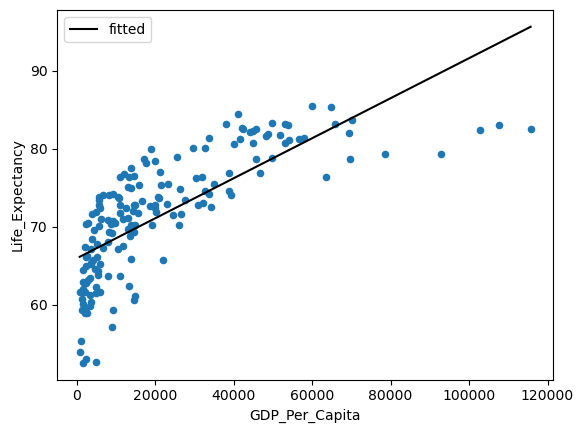

In [22]:
ax = gdp_le_2021.plot(x = 'GDP_Per_Capita', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2021['GDP_Per_Capita'].min(),
        stop = gdp_le_2021['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'GDP_Per_Capita', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

You saw from the guided exploration portion of the project that using the logarithm of the GDP resulted in a larger correlation value. 

Fit a new model using the log of GDP Per Capita as a predictor variable.

**Hint:** You can do this by using `'Life_Expectancy ~ np.log(GDP_Per_Capita)'` as your formula.

In [23]:
lm = smf.ols('Life_Expectancy ~ np.log(GDP_Per_Capita)', data = gdp_le_2021).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.06e-48
Time:                        20:30:37   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 18.9470      2.547      7.438      0.000      13.919      23.975
np.log(GDP_Per_Capita)     5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Q3b: Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of $50,000? What about for those with a gdp per capita of $100,000? 

**3b Ans:** 

mean(life_expectancy) = 21.7086 + 5.5890*log(GDP_Per_Capita)

For every 1 unit increase in the log of GDP per Capita, life expectancy increase by 5.5890 years.

To increase the natural log by 1, we will need to multiply by e (2.718...).

For every 1% increase in GDP_Per_capita, life expectancy increases by 0.055890 year.  

According to the model's estimate, the mean life expectancy for a country whose GDP Per Capita is $50k is expected to be 47.97 years. By the same token, the mean life expectancy for a country whose GDP Per Capita is $100k is expected to be 49.65 years. 

### Q3c: Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?

**3c Ans:** Log Linear Regression gave a much better fit, as evidenced by its much higher Adjusted R^2 value of 0.715 (vs. 0.553)

Let's look at the plot of our fitted vales agains the data.

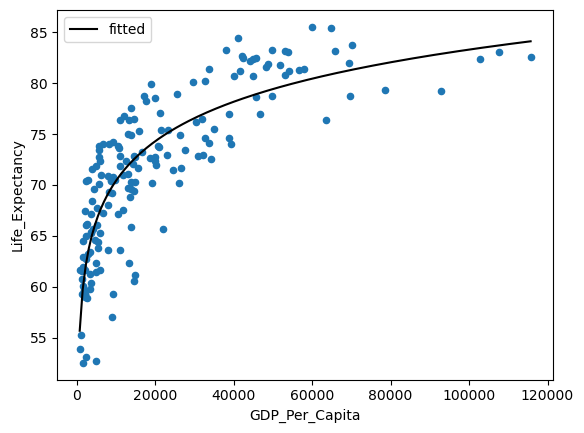

In [24]:
ax = gdp_le_2021.plot(x = 'GDP_Per_Capita', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2021['GDP_Per_Capita'].min(),
        stop = gdp_le_2021['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'GDP_Per_Capita', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

We can plot with GDP Per Capita presented on a log scale.

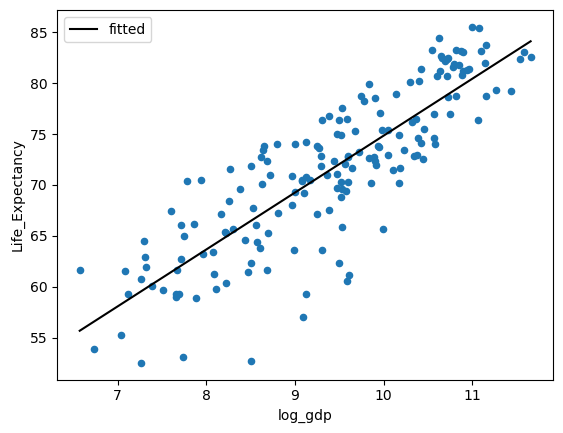

In [25]:
gdp_le_2021['log_gdp'] = np.log(gdp_le_2021['GDP_Per_Capita'])

ax = gdp_le_2021.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2021['GDP_Per_Capita'].min(),
        stop = gdp_le_2021['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'log_gdp', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

# Q4: Finally, return to the full dataset.

## Q4a: First, fit a linear regression model for life expectancy based on the log of gdp per capita. 

Now, let's explore the relationship between health and wealth over time.

First, using all data in gdp_le, fit a model for life expectancy based on number of years since 1990. (Hint: make use of I()) to help with this.

In [26]:
lm = smf.ols('Life_Expectancy ~ I(Year - 1990)', data = gdp_le).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        20:30:37   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** How can you interpret the meaning of both of the coefficients of this model?

Slope:  For every year since 1990, the average life expectancy increased by 0.2677. 
Y-Intercept:  For year 1990, the average life expectancy was 64.6289. 

We can compare the fit model to the data.

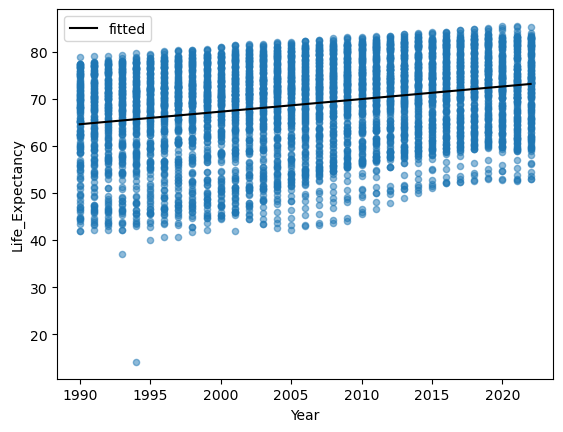

In [27]:
ax = gdp_le.plot(kind = 'scatter', x = 'Year', y = 'Life_Expectancy', alpha = 0.5)

fit_df = pd.DataFrame({
    'Year': np.linspace(
        start = gdp_le['Year'].min(),
        stop = gdp_le['Year'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'Year', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Perhaps we could do better if we include continent in our model. Fit a model which includes a term for Continent. (Don't include any interactions yet).

In [28]:
lm_continent = smf.ols('Life_Expectancy ~ I(Year - 1900) + Continent + I(Year - 1990):Continent', data = gdp_le).fit()
lm_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     795.1
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:30:38   Log-Likelihood:                -17533.
No. Observations:                5504   AIC:                         3.509e+04
Df Residuals:                    5492   BIC:                         3.517e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.0292      0.001     38.571      0.000       0.028       0.031
Continent[T.Asia]                          14.6934      0.459     31.985      0.000      13.793      15.594
Continent[T.Europe]                        21.3186      0.451     47.242      0.000      20.434      22.203
Continent[T.North America]                 18.4246      0.509     36.231      0.000      17.428      19.422
Continent[T.Oceania]                       15.2150      0.670     22.709      0.000      13.902      16.528
Continent[T.South America]                 16.1612      0.674     23.978      0.000      14.840      17.483
I(Year - 1900)                              0.5737      0.003    169.553      0.000       0.567       0.580
I(Year - 1990):Continent[Africa]           -0.1797      0.019     -9.385      0.000      -0.217      -0.142
I(Year - 1990):Continent[Asia]             -0.2838      0.018    -15.360      0.000      -0.320      -0.248
I(Year - 1990):Continent[Europe]           -0.3747      0.018    -21.100      0.000      -0.410      -0.340
I(Year - 1990):Continent[North America]    -0.4040      0.022    -18.266      0.000      -0.447      -0.361
I(Year - 1990):Continent[Oceania]          -0.4654      0.032    -14.606      0.000      -0.528      -0.403
I(Year - 1990):Continent[South America]    -0.3447      0.032    -10.620      0.000      -0.408      -0.281
==============================================================================
Omnibus:                      109.003   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.897
Skew:                           0.240   Prob(JB):                     2.82e-33
Kurtosis:                       3.651   Cond. No.                     4.84e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.7e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Questions:**

1. Is including a term for continent statistically significant?
2. How do you interpret the meaning of the model coefficients?
3. What does the model say about European vs. Asian vs. African countries with respect to life expectancy in 1990 and the increase over time of life expectancy?

For Africa:
mean(ife expectancy) = 53.0815 + 0.2883(Year - 1990)

For Asia:
mean(life expectancy) = 53.0815 + 13.2758 + 0.2883(Year - 1990) = 66.3573 + 0.2883(Year - 1990)

In [29]:
53.0815 + 13.2758

66.3573

For Africa:
Mean(life expectancy) = 51.1577 + 0.4191*(Year - 1990)

For Asia:
Mean(life expectancy) = 51.1577 + 15.1446 + (0.4191 - 0.1271)*(Year - 1990) = 66.3023 + 0.292*(Year - 1990)

In [30]:
51.1577 + 15.1446

66.3023

In [31]:
0.4191 - 0.1271

0.292

In [32]:
sm.stats.anova_lm(lm, lm_continent)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,5502.0,453431.310211,0.0,NaN,NaN,NaN
1,5492.0,188384.023493,10.0,265047.286718,772.698062,0.0


Adjust the `continent` variable below to see the fitted vs. actual values by continent. What do you notice?

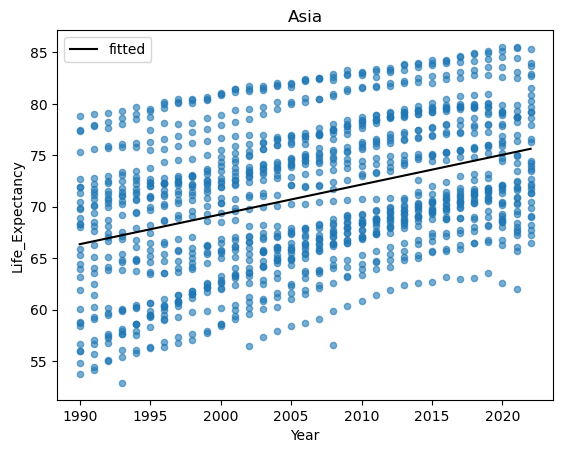

In [33]:
continent = 'Asia'

sub_df = gdp_le[gdp_le['Continent'] == continent]

ax = sub_df.plot(x = 'Year', 
                 y = 'Life_Expectancy',
                 kind = 'scatter',
                 title = continent,
                 alpha = 0.6)

fit_df = pd.DataFrame({
    'Year': np.linspace(start = sub_df['Year'].min(),
                                  stop = sub_df['Year'].max()
                                 ),
    'Continent': continent
})
fit_df['fitted'] = lm_continent.predict(fit_df)
fit_df.plot(x = 'Year', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Now, add an interaction term between Continent and Year to your model.

In [34]:
lm_continent_int = smf.ols('Life_Expectancy ~ I(Year - 1990) + Continent +  I(Year - 1990):Continent', data = gdp_le).fit()
lm_continent_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     795.1
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:30:38   Log-Likelihood:                -17533.
No. Observations:                5504   AIC:                         3.509e+04
Df Residuals:                    5492   BIC:                         3.517e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    51.6602      0.305    169.416      0.000      51.062      52.258
Continent[T.Asia]                            14.6934      0.459     31.985      0.000      13.793      15.594
Continent[T.Europe]                          21.3186      0.451     47.242      0.000      20.434      22.203
Continent[T.North America]                   18.4246      0.509     36.231      0.000      17.428      19.422
Continent[T.Oceania]                         15.2150      0.670     22.709      0.000      13.902      16.528
Continent[T.South America]                   16.1612      0.674     23.978      0.000      14.840      17.483
I(Year - 1990)                                0.3940      0.016     24.400      0.000       0.362       0.426
I(Year - 1990):Continent[T.Asia]             -0.1041      0.024     -4.284      0.000      -0.152      -0.056
I(Year - 1990):Continent[T.Europe]           -0.1950      0.024     -8.207      0.000      -0.242      -0.148
I(Year - 1990):Continent[T.North America]    -0.2243      0.027     -8.254      0.000      -0.278      -0.171
I(Year - 1990):Continent[T.Oceania]          -0.2857      0.036     -8.034      0.000      -0.355      -0.216
I(Year - 1990):Continent[T.South America]    -0.1650      0.036     -4.571      0.000      -0.236      -0.094
==============================================================================
Omnibus:                      109.003   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.897
Skew:                           0.240   Prob(JB):                     2.82e-33
Kurtosis:                       3.651   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

mean(life expectancy) = 51.1577 + 15.1446*Continent[T.Asia] + 0.4191(Year - 1990) + -0.1271 * I(Year - 1990):Continent[T.Asia] 

In Asia:

51.1577 + 15.1446 + 0.4191 I(Year - 1990) + -0.1271 * I(Year - 1990)
(51.1577 + 15.1446) + (0.4191 + -0.1271) * I(Year - 1990)

I(Year - 1990):Continent[T.Asia] 

Continent[T.Asia] = 0 for continent != 'Asia', 1 for continent = 'Asia'

x:y = x*y

I(Year - 1990):Continent[T.Asia] = 0 for continent != 'Asia', I(Year - 1990) for continent = 'Asia'



**Questions:** 
1. Are the interaction terms statistically significant?
2. What does the model say about European vs. Asian vs. African countries with respect to life expectancy in 1990 and the increase over time of life expectancy?

In [35]:
sm.stats.anova_lm(lm, lm_continent_int)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,5502.0,453431.310211,0.0,NaN,NaN,NaN
1,5492.0,188384.023493,10.0,265047.286718,772.698062,0.0


You can uses the code in the next cell to explore the output from the new model.

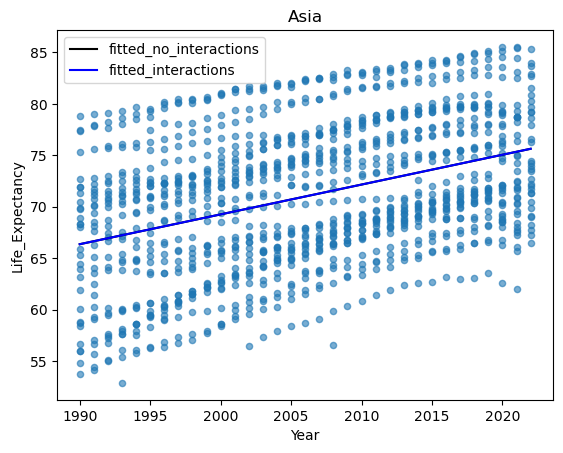

In [36]:
continent = 'Asia'

sub_df = gdp_le[gdp_le['Continent'] == continent]

ax = sub_df.plot(x = 'Year', 
                 y = 'Life_Expectancy',
                 kind = 'scatter',
                 title = continent,
                 alpha = 0.6)

fit_df = pd.DataFrame({
    'Year': np.linspace(start = sub_df['Year'].min(),
                        stop = sub_df['Year'].max()
                       ),
    'Continent': continent
})
fit_df['fitted_no_interactions'] = lm_continent.predict(fit_df)
fit_df['fitted_interactions'] = lm_continent_int.predict(fit_df)
fit_df.plot(x = 'Year', y = 'fitted_no_interactions', ax = ax, color = 'black', label = 'fitted_no_interactions')
fit_df.plot(x = 'Year', y = 'fitted_interactions', ax = ax, color = 'blue', label = 'fitted_interactions');

Summary of Findings: 

Since 1990, the average life expectacny has ncreased. The rate of increases varies by continent, with the highest rate of increase (an increase of 0.4191 per year) happening in Africa and lowest rate of increase in Europe and North America (approximately 0.2 per year). Africa had the lowest average lfe expectancy in 1990, and Europe and North America had the highest. 

For South America, the average life expectancy was 51.1577 + 16.7370 = 67.8947 in 1990, ad rate of increase per year was 0.4191 + -0.1470 = 0.2721 years of life expectancy per year. 

## Part 3: The Effect of Wealth on Health

Now, let's try and uncover the effect of wealth on health, after accounting for the effect of Continent and year.

Fit a model that builds off of your previous model but includes a term for the log of gdp per capita.

In [37]:
lm_gdp = smf.ols('Life_Expectancy ~ I(Year - 1990) + Continent + I(Year - 1990):Continent + np.log(GDP_Per_Capita) + np.log(GDP_Per_Capita):Continent',
                 data = gdp_le).fit()
lm_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1472.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:30:38   Log-Likelihood:                -15432.
No. Observations:                5504   AIC:                         3.090e+04
Df Residuals:                    5486   BIC:                         3.102e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            13.6774      0.889     15.377      0.000      11.934      15.421
Continent[T.Asia]                                    12.9017      1.249     10.326      0.000      10.452      15.351
Continent[T.Europe]                                  16.4136      1.751      9.375      0.000      12.981      19.846
Continent[T.North America]                           15.0432      1.916      7.851      0.000      11.287      18.799
Continent[T.Oceania]                                 11.8575      2.041      5.809      0.000       7.856      15.859
Continent[T.South America]                          -13.0857      5.248     -2.494      0.013     -23.373      -2.798
I(Year - 1990)                                        0.3077      0.011     27.463      0.000       0.286       0.330
I(Year - 1990):Continent[T.Asia]                     -0.1432      0.017     -8.456      0.000      -0.176      -0.110
I(Year - 1990):Continent[T.Europe]                   -0.2032      0.017    -12.186      0.000      -0.236      -0.171
I(Year - 1990):Continent[T.North America]            -0.2069      0.019    -10.961      0.000      -0.244      -0.170
I(Year - 1990):Continent[T.Oceania]                  -0.2580      0.025    -10.529      0.000      -0.306      -0.210
I(Year - 1990):Continent[T.South America]            -0.2372      0.028     -8.606      0.000      -0.291      -0.183
np.log(GDP_Per_Capita)                                4.8853      0.111     43.924      0.000       4.667       5.103
np.log(GDP_Per_Capita):Continent[T.Asia]             -0.3640      0.147     -2.476      0.013      -0.652      -0.076
np.log(GDP_Per_Capita):Continent[T.Europe]           -0.4889      0.189     -2.586      0.010      -0.859      -0.118
np.log(GDP_Per_Capita):Continent[T.North America]    -0.4490      0.211     -2.126      0.034      -0.863      -0.035
np.log(GDP_Per_Capita):Continent[T.Oceania]          -0.0104      0.239     -0.043      0.965      -0.478       0.458
np.log(GDP_Per_Capita):Continent[T.South America]     2.5527      0.581      4.393      0.000       1.413       3.692
==============================================================================
Omnibus:                      439.212   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1344.474
Skew:                          -0.408   Prob(JB):                    1.12e-292
Kurtosis:                       5.280   Cond. No.                     2.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is lar

**Question:** How do we interpret the coefficient of log(gdp)?


Holding year and continent constant, increasing GDP per capita by 1% increases averae life exectancy by 0.044641.

Holding year and continent constant, increasing GDP per capita by 10% increases average life xectancy by 0.44641.

In [38]:
gdp_le['log_gdp'] = np.log(gdp_le['GDP_Per_Capita'])

The resulting model looks at gdp vs. life expectancy by continent. You can explore how the fitted values compare to the actual values by adjusting the values for year and continent below.

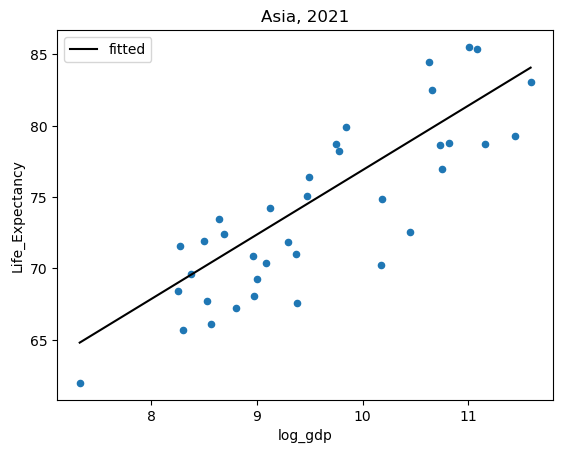

In [39]:
year = 2021
continent = 'Asia'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = f'{continent}, {year}')

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['fitted'] = lm_gdp.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Perhaps we could estimate different effects of gdp per continent. Add an interaction term between continent and gdp.

In [40]:
lm_gdp_cont = smf.ols('Life_Expectancy ~ I(Year - 1990)*Continent + np.log(GDP_Per_Capita)*Continent',
                 data = gdp_le).fit()
lm_gdp_cont.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1472.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:30:39   Log-Likelihood:                -15432.
No. Observations:                5504   AIC:                         3.090e+04
Df Residuals:                    5486   BIC:                         3.102e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            13.6774      0.889     15.377      0.000      11.934      15.421
Continent[T.Asia]                                    12.9017      1.249     10.326      0.000      10.452      15.351
Continent[T.Europe]                                  16.4136      1.751      9.375      0.000      12.981      19.846
Continent[T.North America]                           15.0432      1.916      7.851      0.000      11.287      18.799
Continent[T.Oceania]                                 11.8575      2.041      5.809      0.000       7.856      15.859
Continent[T.South America]                          -13.0857      5.248     -2.494      0.013     -23.373      -2.798
I(Year - 1990)                                        0.3077      0.011     27.463      0.000       0.286       0.330
I(Year - 1990):Continent[T.Asia]                     -0.1432      0.017     -8.456      0.000      -0.176      -0.110
I(Year - 1990):Continent[T.Europe]                   -0.2032      0.017    -12.186      0.000      -0.236      -0.171
I(Year - 1990):Continent[T.North America]            -0.2069      0.019    -10.961      0.000      -0.244      -0.170
I(Year - 1990):Continent[T.Oceania]                  -0.2580      0.025    -10.529      0.000      -0.306      -0.210
I(Year - 1990):Continent[T.South America]            -0.2372      0.028     -8.606      0.000      -0.291      -0.183
np.log(GDP_Per_Capita)                                4.8853      0.111     43.924      0.000       4.667       5.103
np.log(GDP_Per_Capita):Continent[T.Asia]             -0.3640      0.147     -2.476      0.013      -0.652      -0.076
np.log(GDP_Per_Capita):Continent[T.Europe]           -0.4889      0.189     -2.586      0.010      -0.859      -0.118
np.log(GDP_Per_Capita):Continent[T.North America]    -0.4490      0.211     -2.126      0.034      -0.863      -0.035
np.log(GDP_Per_Capita):Continent[T.Oceania]          -0.0104      0.239     -0.043      0.965      -0.478       0.458
np.log(GDP_Per_Capita):Continent[T.South America]     2.5527      0.581      4.393      0.000       1.413       3.692
==============================================================================
Omnibus:                      439.212   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1344.474
Skew:                          -0.408   Prob(JB):                    1.12e-292
Kurtosis:                       5.280   Cond. No.                     2.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is lar

**Questions:** 
1. Are the new interaction terms statistically significant?
2. What does the model say about European vs. Asian vs. African countries with respect to the effect of gdp on life expectancy?

In [41]:
lm_gdp_cont = smf.ols('Life_Expectancy ~ Continent*np.log(GDP_Per_Capita)',
                 data = gdp_le).fit()
lm_gdp_cont.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1831.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:30:39   Log-Likelihood:                -15914.
No. Observations:                5504   AIC:                         3.185e+04
Df Residuals:                    5492   BIC:                         3.193e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            14.3774      0.970     14.822      0.000      12.476      16.279
Continent[T.Asia]                                    12.4907      1.363      9.167      0.000       9.820      15.162
Continent[T.Europe]                                  13.9802      1.897      7.371      0.000      10.262      17.699
Continent[T.North America]                           13.8625      2.089      6.637      0.000       9.768      17.957
Continent[T.Oceania]                                 11.4798      2.221      5.168      0.000       7.125      15.835
Continent[T.South America]                          -19.8897      5.208     -3.819      0.000     -30.100      -9.679
np.log(GDP_Per_Capita)                                5.4210      0.119     45.378      0.000       5.187       5.655
Continent[T.Asia]:np.log(GDP_Per_Capita)             -0.6382      0.157     -4.054      0.000      -0.947      -0.330
Continent[T.Europe]:np.log(GDP_Per_Capita)           -0.6809      0.200     -3.400      0.001      -1.073      -0.288
Continent[T.North America]:np.log(GDP_Per_Capita)    -0.7659      0.227     -3.380      0.001      -1.210      -0.322
Continent[T.Oceania]:np.log(GDP_Per_Capita)          -0.4899      0.258     -1.897      0.058      -0.996       0.016
Continent[T.South America]:np.log(GDP_Per_Capita)     2.7881      0.558      4.997      0.000       1.694       3.882
==============================================================================
Omnibus:                      440.884   Durbin-Watson:                   0.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1070.936
Skew:                          -0.482   Prob(JB):                    2.81e-233
Kurtosis:                       4.934   Cond. No.                         901.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

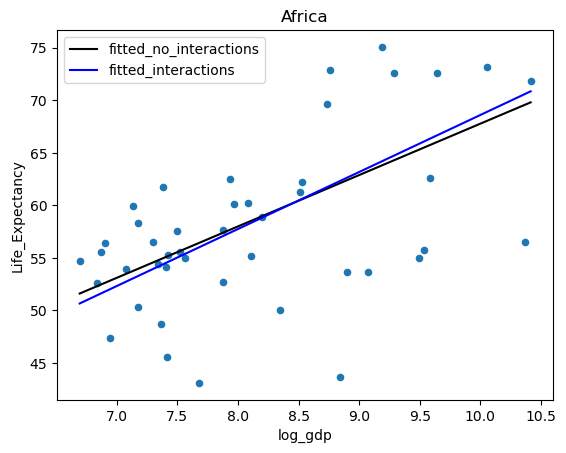

In [42]:
year = 2007
continent = 'Africa'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = continent)

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['fitted_no_interactions'] = lm_gdp.predict(fit_df)
fit_df['fitted_interactions'] = lm_gdp_cont.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'fitted_no_interactions', ax = ax, color = 'black', label = 'fitted_no_interactions');
fit_df.plot(x = 'log_gdp', y = 'fitted_interactions', ax = ax, color = 'blue', label = 'fitted_interactions');

Finally, add an interaction term between log(gdp) and year.

In [43]:
lm_gdp_cont_year = smf.ols('Life_Expectancy ~ I(Year - 1990) + Continent + Continent:(I(Year - 1990) + np.log(GDP_Per_Capita)) + np.log(GDP_Per_Capita) + np.log(GDP_Per_Capita):I(Year - 1990)', data = gdp_le).fit()
lm_gdp_cont_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1398.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:30:39   Log-Likelihood:                -15419.
No. Observations:                5504   AIC:                         3.088e+04
Df Residuals:                    5485   BIC:                         3.100e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             9.4735      1.219      7.773      0.000       7.084      11.863
Continent[T.Asia]                                    12.7016      1.247     10.184      0.000      10.256      15.147
Continent[T.Europe]                                  16.1391      1.748      9.234      0.000      12.713      19.565
Continent[T.North America]                           14.4163      1.916      7.525      0.000      10.660      18.172
Continent[T.Oceania]                                 11.4324      2.038      5.608      0.000       7.436      15.429
Continent[T.South America]                          -13.4459      5.237     -2.568      0.010     -23.712      -3.180
I(Year - 1990)                                        0.5638      0.052     10.823      0.000       0.462       0.666
Continent[T.Asia]:I(Year - 1990)                     -0.1030      0.019     -5.517      0.000      -0.140      -0.066
Continent[T.Europe]:I(Year - 1990)                   -0.1348      0.021     -6.272      0.000      -0.177      -0.093
Continent[T.North America]:I(Year - 1990)            -0.1584      0.021     -7.487      0.000      -0.200      -0.117
Continent[T.Oceania]:I(Year - 1990)                  -0.2372      0.025     -9.566      0.000      -0.286      -0.189
Continent[T.South America]:I(Year - 1990)            -0.1934      0.029     -6.708      0.000      -0.250      -0.137
np.log(GDP_Per_Capita)                                5.4156      0.153     35.389      0.000       5.116       5.716
Continent[T.Asia]:np.log(GDP_Per_Capita)             -0.4115      0.147     -2.800      0.005      -0.700      -0.123
Continent[T.Europe]:np.log(GDP_Per_Capita)           -0.5734      0.189     -3.028      0.002      -0.945      -0.202
Continent[T.North America]:np.log(GDP_Per_Capita)    -0.4683      0.211     -2.222      0.026      -0.882      -0.055
Continent[T.Oceania]:np.log(GDP_Per_Capita)          -0.0031      0.238     -0.013      0.990      -0.470       0.464
Continent[T.South America]:np.log(GDP_Per_Capita)     2.5148      0.580      4.337      0.000       1.378       3.652
np.log(GDP_Per_Capita):I(Year - 1990)                -0.0319      0.006     -5.033      0.000      -0.044      -0.019
==============================================================================
Omnibus:                      436.171   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.315
Skew:                          -0.415   Prob(JB):                    8.77e-282
Kurtosis:                       5.226   Cond. No.                     1.75e+04
==============================================================================

Notes:
[1] S

**Question:** How do we interpret the new interaction term?

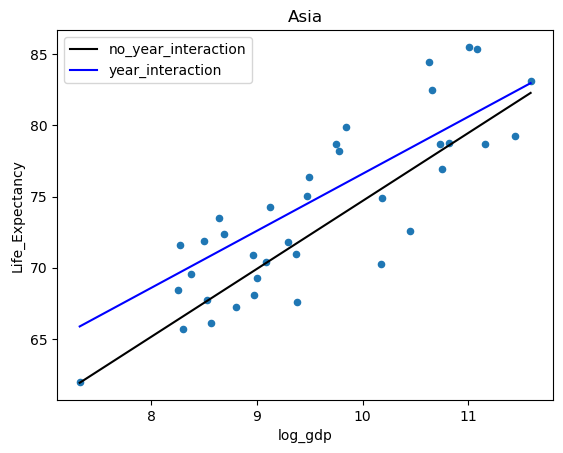

In [44]:
year = 2021
continent = 'Asia'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = continent)

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['year_interaction'] = lm_gdp_cont_year.predict(fit_df)
fit_df['no_year_interaction'] = lm_gdp_cont.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'no_year_interaction', ax = ax, color = 'black', label = 'no_year_interaction');
fit_df.plot(x = 'log_gdp', y = 'year_interaction', ax = ax, color = 'blue', label = 'year_interaction');

<Axes: xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

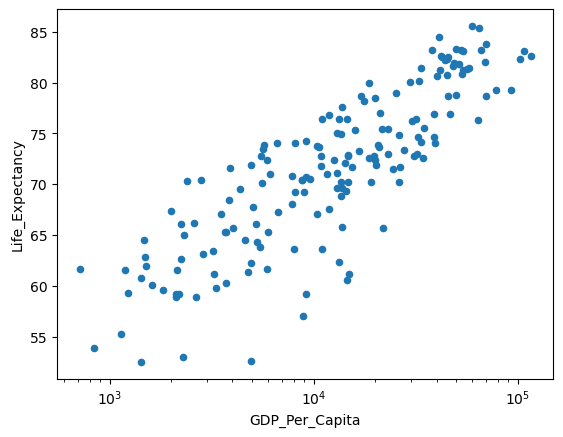

In [45]:
year = 2021

gdp_le[gdp_le['Year'] == year].plot(kind = "scatter", x = "GDP_Per_Capita", y = "Life_Expectancy", logx = True)



In [46]:
lm = smf.ols('Life_Expectancy ~ np.log(GDP_Per_Capita)', data = gdp_le[gdp_le['Year'] == year]).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.06e-48
Time:                        20:30:40   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 18.9470      2.547      7.438      0.000      13.919      23.975
np.log(GDP_Per_Capita)     5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

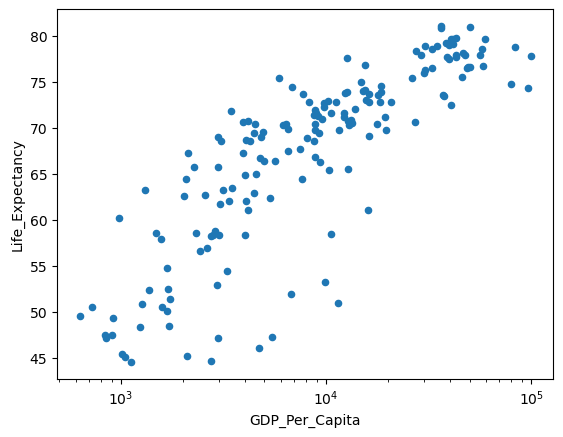

In [47]:
year = 2000

gdp_le[gdp_le['Year'] == year].plot(kind = "scatter", x = "GDP_Per_Capita", y = "Life_Expectancy", logx = True)

# lm = smf.ols('Life_Expectancy ~ np.log(GDP_Per_Capita)', data = gdp_le[gdp_le['Year'] == year]).fit()

# lm.summary()

<Axes: xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

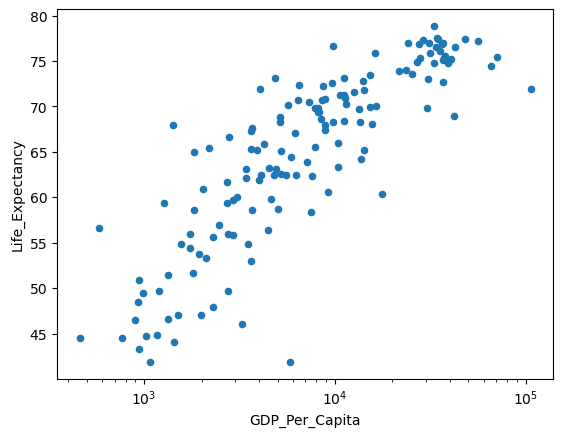

In [48]:
year = 1990

gdp_le[gdp_le['Year'] == year].plot(kind = "scatter", x = "GDP_Per_Capita", y = "Life_Expectancy", logx = True)

# lm = smf.ols('Life_Expectancy ~ np.log(GDP_Per_Capita)', data = gdp_le[gdp_le['Year'] == year]).fit()

# lm.summary()

In [49]:
gdp_le.shape

(5504, 6)